<a href="https://colab.research.google.com/github/sagnikmitra/Gender_Recognition_by_Voice/blob/main/GenderRecognitionByVoice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import os
print(os.listdir())
import librosa

['.git', '.ipynb_checkpoints', '.vscode', 'Accuracy_List.csv', 'app.png', 'app.py', 'AudioSet', 'classical.00096.wav', 'female.gmm', 'Gender Recognition.ipynb', 'GenderRecognitionByVoice.ipynb', 'male.gmm', 'packages.txt', 'Procfile', 'README.md', 'requirements.txt', 'setup.sh', 'voice.csv']


In [9]:
import warnings
warnings.filterwarnings('ignore')
# read file
voice=pd.read_csv('voice.csv')
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [10]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [11]:
voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
voice["label"] = le.fit_transform(voice["label"])
le.classes_

array(['female', 'male'], dtype=object)

In [13]:
voice[:]=preprocessing.MinMaxScaler().fit_transform(voice)
voice

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,...,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1.0
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,...,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1.0
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,...,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1.0
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,...,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1.0
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,...,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.436911,0.684871,0.570361,0.198513,0.686256,0.577704,0.046854,0.003489,0.921665,0.901057,...,0.436911,0.698762,0.380813,0.904450,0.279703,0.006452,0.192280,0.192418,0.173674,0.0
3164,0.362946,0.731172,0.262871,0.171937,0.702595,0.621185,0.015961,0.000333,0.912549,0.834545,...,0.362946,0.732760,0.126776,0.981526,0.305791,0.075269,0.167977,0.166667,0.298053,0.0
3165,0.484949,0.799042,0.690337,0.134329,0.786967,0.742124,0.050161,0.003469,0.855587,0.765849,...,0.484949,0.847759,0.153011,0.981526,0.164908,0.006452,0.134024,0.134120,0.208885,0.0
3166,0.492516,0.745692,0.695311,0.175136,0.767804,0.681107,0.041908,0.002539,0.870307,0.792241,...,0.492516,0.641561,0.127158,0.834600,0.265621,0.006452,0.164046,0.164163,0.333559,0.0


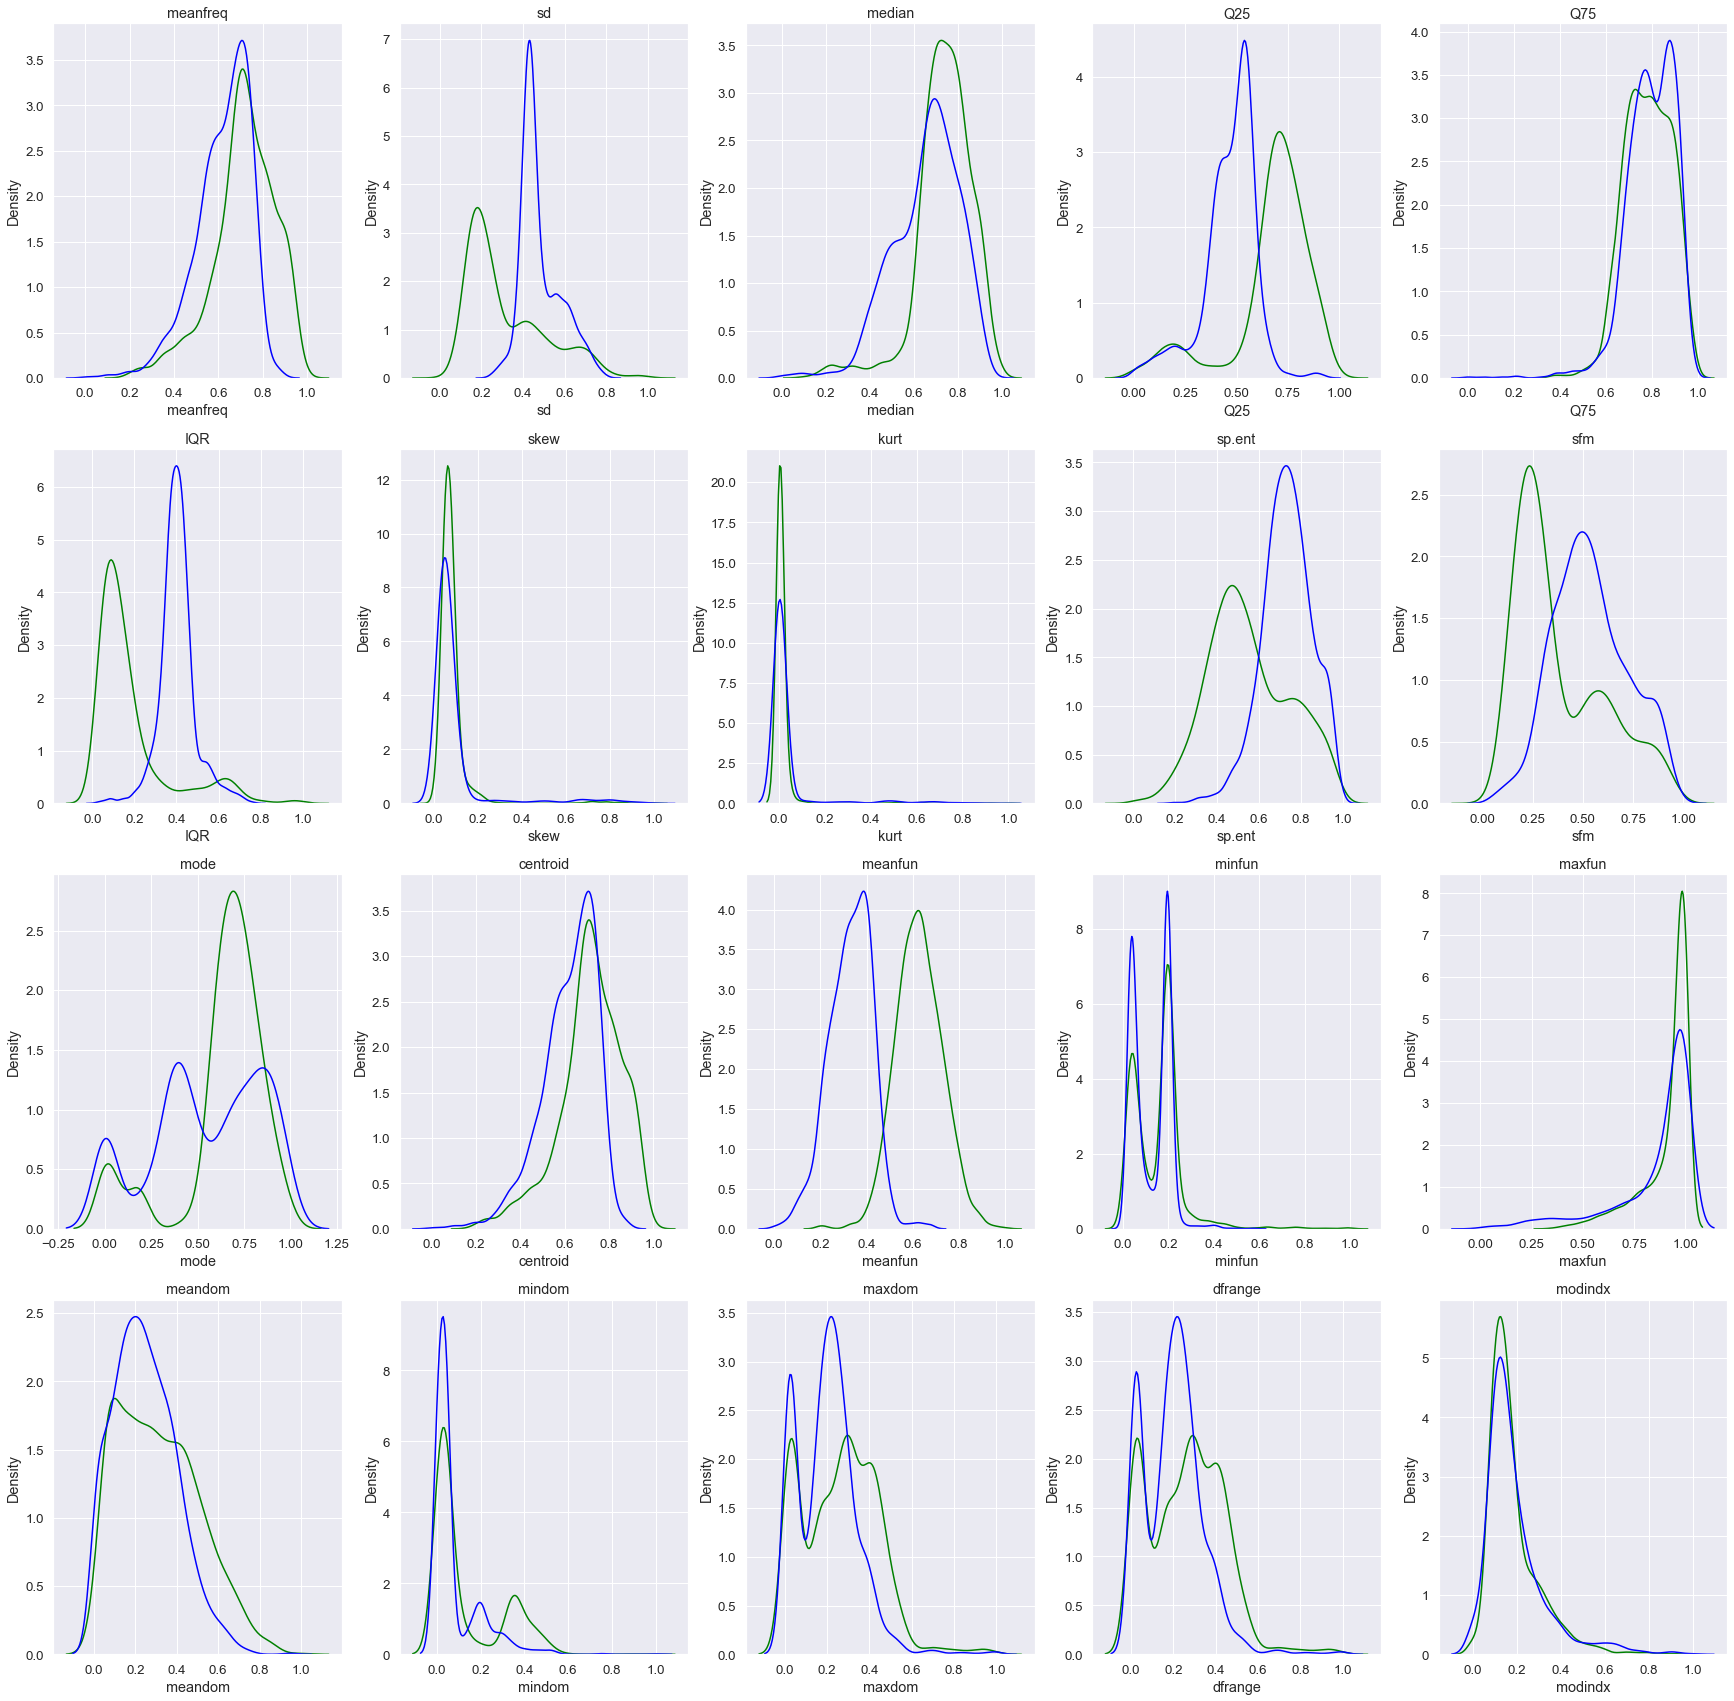

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(4,5,figsize=(30,30))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(voice.columns[i-1])
    sns.kdeplot(voice.loc[voice['label'] == 0, voice.columns[i-1]], color= 'green', label='F')
    sns.kdeplot(voice.loc[voice['label'] == 1, voice.columns[i-1]], color= 'blue', label='M')

## Choosing Best Three Key Attributes

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [16]:
data_raw = pd.read_csv('voice.csv')


In [17]:
print('Missing entries:', data_raw.isnull().sum().sum())
print('\n')
data_raw.info()
print('\n')
data_raw.describe()

Missing entries: 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label    

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


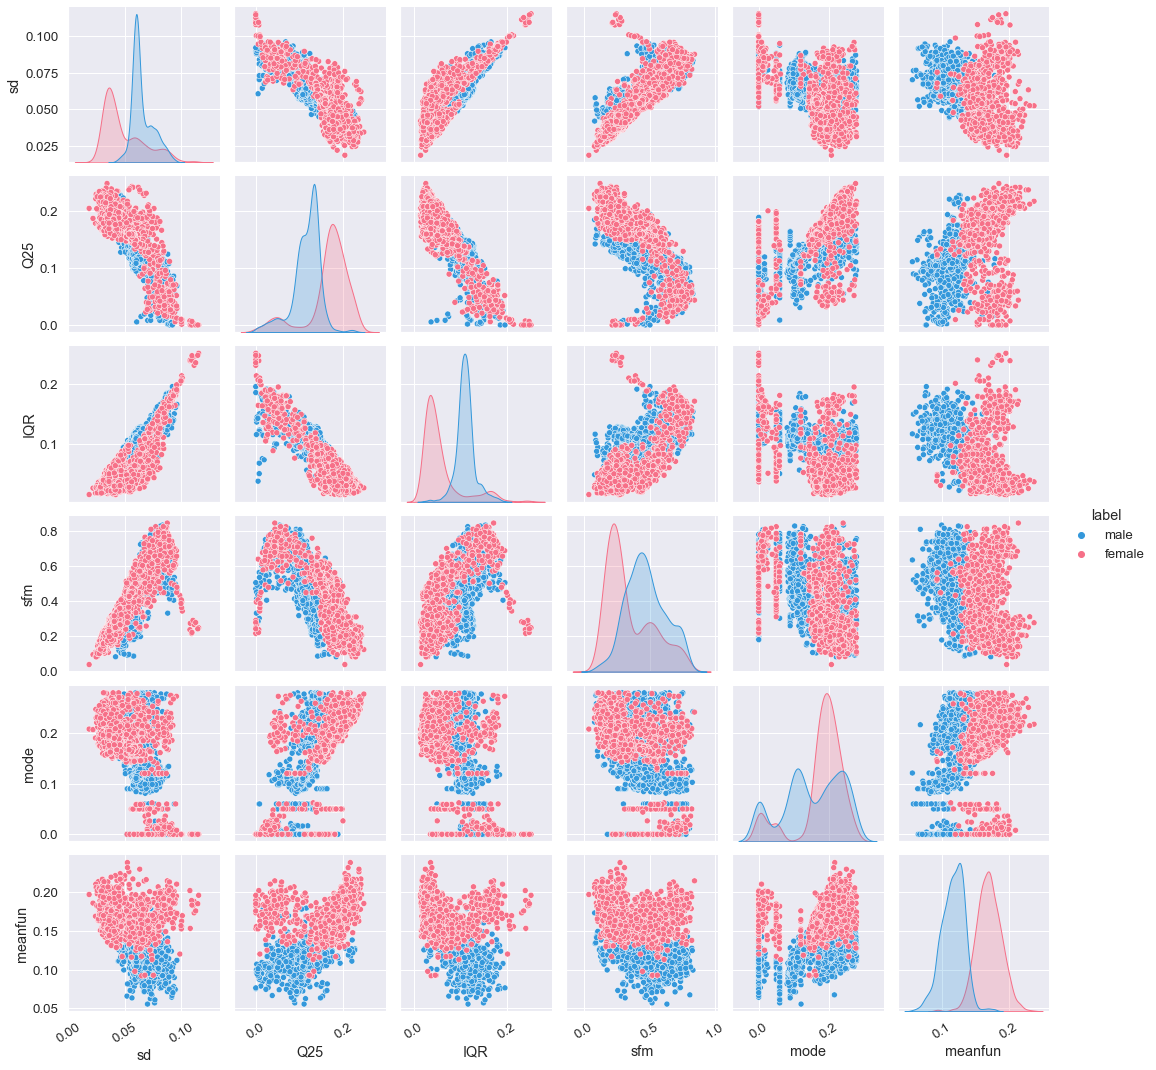

In [18]:
data_of_interest = ['sd','Q25','IQR','sfm','mode','meanfun']
clr_m  = '#3498db'  # blue
clr_fm = '#F67088'  # pink
sns.set(font_scale=1.2)
g = sns.pairplot(data_raw[data_of_interest + ['label']],
                 palette=sns.color_palette([clr_m, clr_fm]), 
                 hue='label',
                 size=2.5)
for ax in g.axes.flatten():
    for t in ax.get_xticklabels():
        t.set(rotation=33)

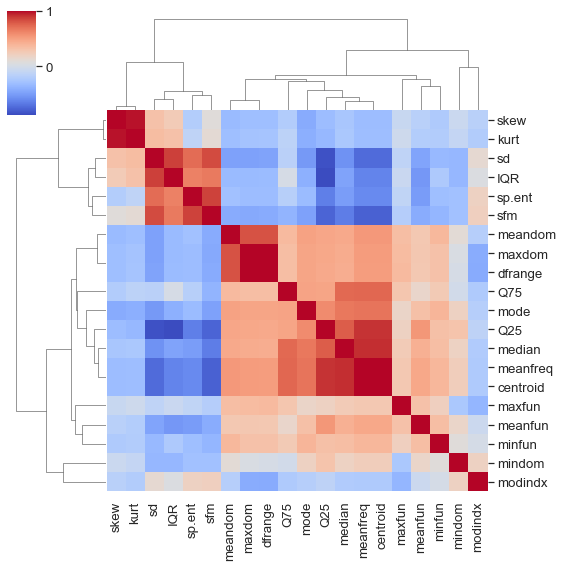

In [19]:
g = sns.clustermap(data_raw.corr(), cmap='coolwarm', figsize=(8,8))
for text in g.ax_heatmap.get_yticklabels():
    text.set_rotation('horizontal')

## Preprocessing the Data with SKLearn

In [20]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import accuracy_score

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network
import xgboost

In [21]:
train, test = train_test_split(voice, test_size=0.3)

In [22]:
train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
82,0.741876,0.404944,0.772957,0.630882,0.891441,0.327159,0.030515,0.001561,0.755606,0.443745,...,0.741876,0.617740,0.043053,0.981526,0.368598,0.316129,0.301287,0.295064,0.277802,1.0
1152,0.713251,0.451478,0.721158,0.535569,0.906201,0.440578,0.038667,0.001790,0.648058,0.412732,...,0.713251,0.369969,0.195251,0.912637,0.254977,0.040860,0.387777,0.387339,0.072828,1.0
377,0.692031,0.453985,0.749082,0.537998,0.863634,0.396765,0.036275,0.002620,0.803987,0.601380,...,0.692031,0.315834,0.054857,0.522830,0.233469,0.298925,0.247320,0.241416,0.177706,1.0
1061,0.732913,0.406071,0.825789,0.556526,0.857036,0.371101,0.054694,0.004419,0.692954,0.412786,...,0.732913,0.380778,0.198216,0.999749,0.643920,0.040860,0.387777,0.387339,0.138037,1.0
676,0.551490,0.433564,0.547127,0.424392,0.728277,0.383600,0.094660,0.011842,0.713723,0.560922,...,0.551490,0.301229,0.050210,0.735510,0.278890,0.000000,0.173651,0.173909,0.224206,1.0


In [23]:
x_train = train.iloc[:, :-1]
y_train = train["label"]
x_test = test.iloc[:, :-1]
y_test = test["label"]

In [24]:
x_train3 = train[["meanfun","IQR","Q25"]]
y_train3 = train["label"]
x_test3 = test[["meanfun","IQR","Q25"]]
y_test3 = test["label"]

In [25]:
def classify(model,x_train,y_train,x_test,y_test):
    from sklearn.metrics import classification_report
    target_names = ['female', 'male']
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))
    a = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:",a)
    return a

In [26]:
accli=pd.read_csv('Accuracy_List.csv')
accli.set_index("Algorithm", inplace = True)
accli.at['K-Nearest Neighbours', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['K-Nearest Neighbours', 'Accuracy (considering all attributes)'] = 0
accli.at['Naïve Bayes', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['Naïve Bayes', 'Accuracy (considering all attributes)'] = 0
accli.at['Random Forest', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['Random Forest', 'Accuracy (considering all attributes)'] = 0
accli.at['XgBoost', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['XgBoost', 'Accuracy (considering all attributes)'] = 0
accli.at['Support Vector Machine', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['Support Vector Machine', 'Accuracy (considering all attributes)'] = 0
accli.at['Neural Network (MLP Classifier)', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['Neural Network (MLP Classifier)', 'Accuracy (considering all attributes)'] = 0

accli

,"Accuracy (considering only IQR, meanfun & Q25)",Accuracy (considering all attributes)
Algorithm,,
K-Nearest Neighbours,0.000000,0.000000
Naïve Bayes,0.000000,0.000000
Decision Tree,0.971609,0.971609
Random Forest,0.000000,0.000000
XgBoost,0.000000,0.000000
Support Vector Machine,0.000000,0.000000
Neural Network (MLP Classifier),0.000000,0.000000


In [27]:
list = accli.index
list

Index(['K-Nearest Neighbours', 'Naïve Bayes', 'Decision Tree', 'Random Forest',
       'XgBoost', 'Support Vector Machine', 'Neural Network (MLP Classifier)'],
      dtype='object', name='Algorithm')

## KNearest Neighbours

In [28]:
def knn_error(k,x_train,y_train,x_test,y_test):
    error_rate = []
    K=range(1,k)
    for i in K:
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at k=%s." % (error_rate[kloc], K[kloc]))

    plt.plot(K, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    return K[kloc]

Lowest error is 0.013669821240799159 occurs at k=2.


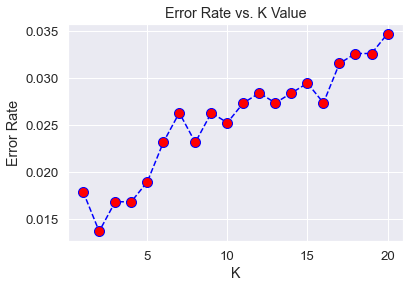

In [29]:
k=knn_error(21,x_train,y_train,x_test,y_test)

In [30]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
t = classify(model,x_train,y_train,x_test,y_test)
accli.at['K-Nearest Neighbours', 'Accuracy (considering all attributes)'] = t

              precision    recall  f1-score   support

      female     0.9804    0.9912    0.9858       455
        male     0.9919    0.9819    0.9868       496

    accuracy                         0.9863       951
   macro avg     0.9861    0.9865    0.9863       951
weighted avg     0.9864    0.9863    0.9863       951

Accuracy: 0.9863301787592008


Lowest error is 0.028391167192429023 occurs at k=3.


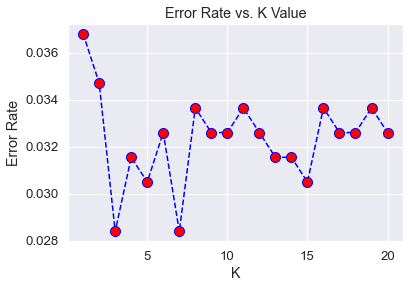

In [31]:
k=knn_error(21,x_train3,y_train3,x_test3,y_test3)

In [32]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
t = classify(model,x_train3,y_train3,x_test3,y_test3)
accli.at['K-Nearest Neighbours', 'Accuracy (considering only IQR, meanfun & Q25)'] = t

              precision    recall  f1-score   support

      female     0.9672    0.9736    0.9704       455
        male     0.9757    0.9698    0.9727       496

    accuracy                         0.9716       951
   macro avg     0.9715    0.9717    0.9716       951
weighted avg     0.9716    0.9716    0.9716       951

Accuracy: 0.9716088328075709


## Gaussian Naive Bayes

In [33]:
model=naive_bayes.GaussianNB()
t = classify(model,x_train,y_train,x_test,y_test)
accli.at['Naïve Bayes', 'Accuracy (considering all attributes)'] = t

              precision    recall  f1-score   support

      female     0.8872    0.8813    0.8842       455
        male     0.8918    0.8972    0.8945       496

    accuracy                         0.8896       951
   macro avg     0.8895    0.8892    0.8894       951
weighted avg     0.8896    0.8896    0.8896       951

Accuracy: 0.889589905362776


In [34]:
model=naive_bayes.GaussianNB()
t = classify(model,x_train3,y_train3,x_test3,y_test3)
accli.at['Naïve Bayes', 'Accuracy (considering only IQR, meanfun & Q25)'] = t

              precision    recall  f1-score   support

      female     0.9670    0.9648    0.9659       455
        male     0.9678    0.9698    0.9688       496

    accuracy                         0.9674       951
   macro avg     0.9674    0.9673    0.9673       951
weighted avg     0.9674    0.9674    0.9674       951

Accuracy: 0.9674027339642481


## Random Forest

In [35]:
def rf_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    e=range(1,n,20)
    for i in e:
        model = ensemble.RandomForestClassifier(n_estimators = i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    nloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[nloc], e[nloc]))

    plt.plot(e, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. n Value')
    plt.xlabel('n')
    plt.ylabel('Error Rate')
    plt.show()
    return e[nloc]

Lowest error is 0.016824395373291272 occurs at n=21.


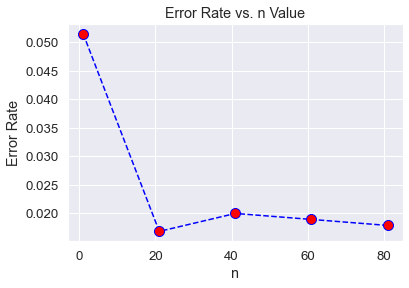

In [36]:
e=rf_error(100,x_train,y_train,x_test,y_test)

In [37]:
model=ensemble.RandomForestClassifier(n_estimators = e)
t = classify(model,x_train,y_train,x_test,y_test)
accli.at['Random Forest', 'Accuracy (considering all attributes)'] = t

              precision    recall  f1-score   support

      female     0.9760    0.9824    0.9792       455
        male     0.9838    0.9778    0.9808       496

    accuracy                         0.9800       951
   macro avg     0.9799    0.9801    0.9800       951
weighted avg     0.9800    0.9800    0.9800       951

Accuracy: 0.9800210304942166


Lowest error is 0.024185068349106203 occurs at n=41.


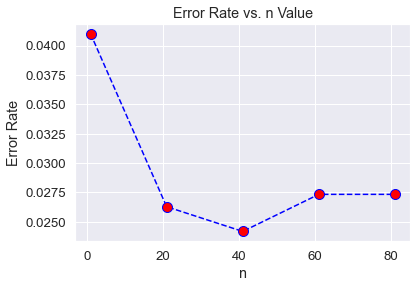

In [38]:
e=rf_error(100,x_train3,y_train3,x_test3,y_test3)

In [39]:
model=ensemble.RandomForestClassifier(n_estimators = e)
t = classify(model,x_train3,y_train3,x_test3,y_test3)
accli.at['Random Forest', 'Accuracy (considering only IQR, meanfun & Q25)'] = t

              precision    recall  f1-score   support

      female     0.9715    0.9736    0.9726       455
        male     0.9758    0.9738    0.9748       496

    accuracy                         0.9737       951
   macro avg     0.9736    0.9737    0.9737       951
weighted avg     0.9737    0.9737    0.9737       951

Accuracy: 0.9737118822292324


## XGBoost

In [40]:
model = xgboost.XGBClassifier()
t = classify(model,x_train,y_train,x_test,y_test)
accli.at['XgBoost', 'Accuracy (considering all attributes)'] = t

[05:40:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

      female     0.9824    0.9802    0.9813       455
        male     0.9819    0.9839    0.9829       496

    accuracy                         0.9821       951
   macro avg     0.9821    0.9820    0.9821       951
weighted avg     0.9821    0.9821    0.9821       951

Accuracy: 0.982124079915878


In [41]:
model = xgboost.XGBClassifier()
t = classify(model,x_train3,y_train3,x_test3,y_test3)
accli.at['XgBoost', 'Accuracy (considering only IQR, meanfun & Q25)'] = t

[05:40:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

      female     0.9695    0.9780    0.9737       455
        male     0.9797    0.9718    0.9757       496

    accuracy                         0.9748       951
   macro avg     0.9746    0.9749    0.9747       951
weighted avg     0.9748    0.9748    0.9748       951

Accuracy: 0.9747634069400631


## Support Vector Machine

In [42]:

def svm_kernel(x_train,y_train,x_test,y_test):
    rate=[]
    kernel=['rbf','poly','linear']
    for i in kernel:
        model=svm.SVC(kernel=i).fit(x_train,y_train)
        y_pred=model.predict(x_train)
        print(i, ' in-sample accuracy in SVM: ', accuracy_score(y_train,y_pred))
        y_pred=model.predict(x_test)
        print(i, ' out-of-sample accuracy in SVM: ', accuracy_score(y_test,y_pred))
        rate.append(accuracy_score(y_test,y_pred))
    nloc = rate.index(max(rate))
    print("Highest accuracy is %s occurs at %s kernel." % (rate[nloc], kernel[nloc]))
    return kernel[nloc]

In [43]:
def svm_error (k ,C , x_train , y_train , x_test , y_test ) :
    error_rate = []
    C = range (1 , C)
    for i in C :
        model = svm . SVC ( kernel =k , C = i ) . fit ( x_train , y_train )
        model . fit ( x_train , y_train )

        y_pred = model . predict ( x_test )
        error_rate . append ( np . mean ( y_pred != y_test ) )
    cloc = error_rate.index(min( error_rate ) )
    print (" Lowest error is %s occurs at C=%s." % ( error_rate [ cloc ] , C [cloc]) )
    return error_rate[cloc]

In [44]:
k=svm_kernel(x_train,y_train,x_test,y_test)

rbf  in-sample accuracy in SVM:  0.9778980604420388
rbf  out-of-sample accuracy in SVM:  0.9779179810725552
poly  in-sample accuracy in SVM:  0.9815065403698692
poly  out-of-sample accuracy in SVM:  0.9852786540483701
linear  in-sample accuracy in SVM:  0.9724853405502932
linear  out-of-sample accuracy in SVM:  0.9789695057833859
Highest accuracy is 0.9852786540483701 occurs at poly kernel.


In [45]:
c=svm_error(k,10,x_train,y_train,x_test,y_test)


 Lowest error is 0.014721345951629864 occurs at C=1.


In [46]:
model=svm.SVC(kernel=k,C=c)
t = classify(model,x_train,y_train,x_test,y_test)
accli.at['Support Vector Machine', 'Accuracy (considering all attributes)'] = t

              precision    recall  f1-score   support

      female     0.9756    0.9670    0.9713       455
        male     0.9700    0.9778    0.9739       496

    accuracy                         0.9727       951
   macro avg     0.9728    0.9724    0.9726       951
weighted avg     0.9727    0.9727    0.9727       951

Accuracy: 0.9726603575184016


In [47]:
k=svm_kernel(x_train3,y_train3,x_test3,y_test3)

rbf  in-sample accuracy in SVM:  0.9697789806044204
rbf  out-of-sample accuracy in SVM:  0.9705573080967402
poly  in-sample accuracy in SVM:  0.9670726206585476
poly  out-of-sample accuracy in SVM:  0.9737118822292324
linear  in-sample accuracy in SVM:  0.9612088407758231
linear  out-of-sample accuracy in SVM:  0.9779179810725552
Highest accuracy is 0.9779179810725552 occurs at linear kernel.


In [48]:
c=svm_error(k,10,x_train3,y_train3,x_test3,y_test3)

 Lowest error is 0.019978969505783387 occurs at C=2.


In [49]:
model=svm.SVC(kernel=k,C=c)
t = classify(model,x_train3,y_train3,x_test3,y_test3)
accli.at['Support Vector Machine', 'Accuracy (considering only IQR, meanfun & Q25)'] = t

              precision    recall  f1-score   support

      female     0.9699    0.8505    0.9063       455
        male     0.8768    0.9758    0.9237       496

    accuracy                         0.9159       951
   macro avg     0.9234    0.9132    0.9150       951
weighted avg     0.9214    0.9159    0.9154       951

Accuracy: 0.9158780231335436


## Neural Network

In [50]:
def nn_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=range(1,n)
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=i,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[kloc], hidden_layer[kloc]))

    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Error Rate')
    plt.show()
    return hidden_layer[kloc]

Lowest error is 0.024185068349106203 occurs at C=9.


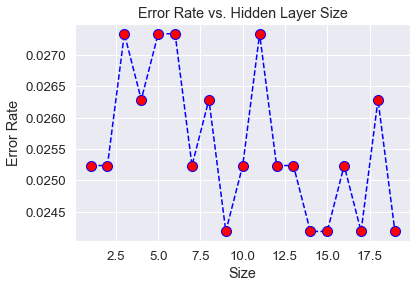

In [51]:
h=nn_error(20,x_train,y_train,x_test,y_test)

In [52]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
t = classify(model,x_train,y_train,x_test,y_test)
accli.at['Neural Network (MLP Classifier)', 'Accuracy (considering all attributes)'] = t

              precision    recall  f1-score   support

      female     0.9716    0.9780    0.9748       455
        male     0.9797    0.9738    0.9767       496

    accuracy                         0.9758       951
   macro avg     0.9757    0.9759    0.9758       951
weighted avg     0.9758    0.9758    0.9758       951

Accuracy: 0.9758149316508938


Lowest error is 0.02103049421661409 occurs at C=7.


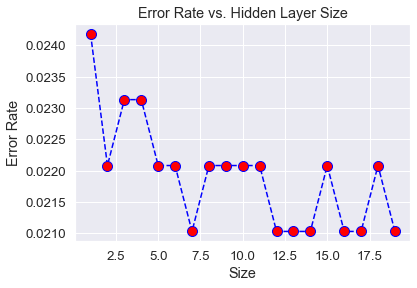

In [53]:
h=nn_error(20,x_train3,y_train3,x_test3,y_test3)

In [54]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
t = classify(model,x_train3,y_train3,x_test3,y_test3)
accli.at['Neural Network (MLP Classifier)', 'Accuracy (considering only IQR, meanfun & Q25)'] = t

              precision    recall  f1-score   support

      female     0.9866    0.9692    0.9778       455
        male     0.9722    0.9879    0.9800       496

    accuracy                         0.9790       951
   macro avg     0.9794    0.9786    0.9789       951
weighted avg     0.9791    0.9790    0.9790       951

Accuracy: 0.9789695057833859


In [55]:
accli

,"Accuracy (considering only IQR, meanfun & Q25)",Accuracy (considering all attributes)
Algorithm,,
K-Nearest Neighbours,0.971609,0.986330
Naïve Bayes,0.967403,0.889590
Decision Tree,0.971609,0.971609
Random Forest,0.973712,0.980021
XgBoost,0.974763,0.982124
Support Vector Machine,0.915878,0.972660
Neural Network (MLP Classifier),0.978970,0.975815


In [56]:
print(accli.index)

Index(['K-Nearest Neighbours', 'Naïve Bayes', 'Decision Tree', 'Random Forest',
       'XgBoost', 'Support Vector Machine', 'Neural Network (MLP Classifier)'],
      dtype='object', name='Algorithm')


In [57]:
min_max_scaler = preprocessing.MinMaxScaler()

In [58]:
accli[["Accuracy (considering only IQR, meanfun & Q25)", "Accuracy (considering all attributes)"]] = min_max_scaler.fit_transform(accli[["Accuracy (considering only IQR, meanfun & Q25)", "Accuracy (considering all attributes)"]])

## Comparative Graphical Plot of the Different Algorithms used

<AxesSubplot:xlabel='Algorithm'>

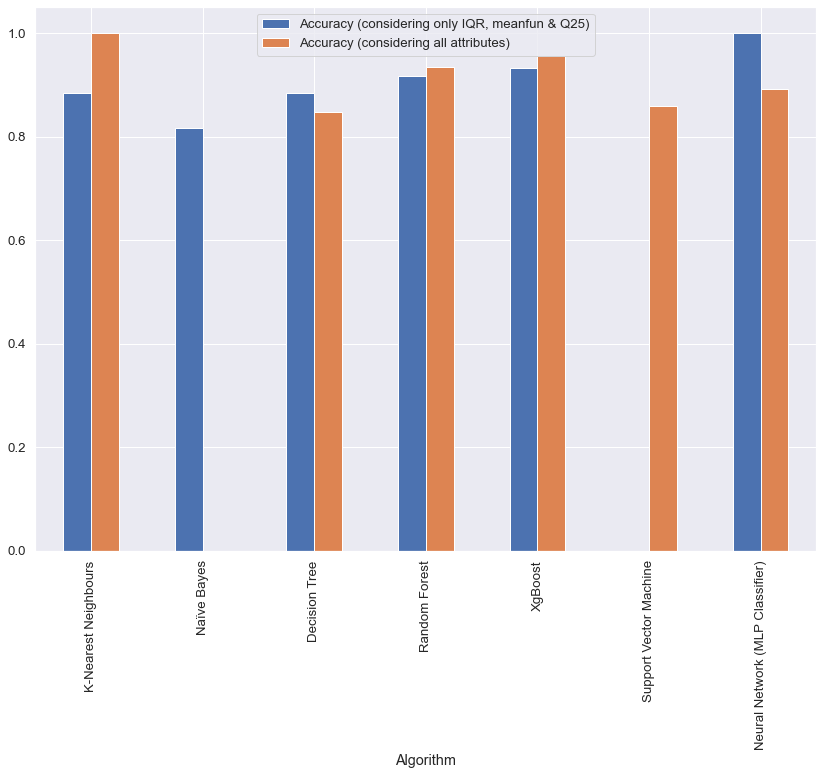

In [59]:
accli.plot.bar(figsize = (14,10))

## Audio Properties

## GTZAN Classical Audio Data

In [60]:
audio_data = 'classical.00096.wav'
data , sr = librosa.load(audio_data)
print ( type ( data ) , type ( sr ) )

<class 'numpy.ndarray'> <class 'int'>


In [61]:
import librosa.display

## Waveplot

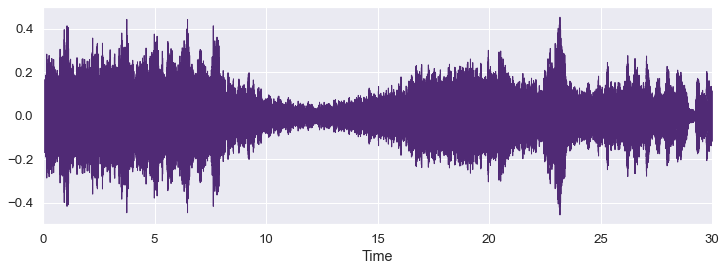

In [62]:
plt . figure ( figsize =(12 , 4) )
librosa.display.waveplot( data , color = "#502A75")
plt.show ()

## Plot Spectrogram

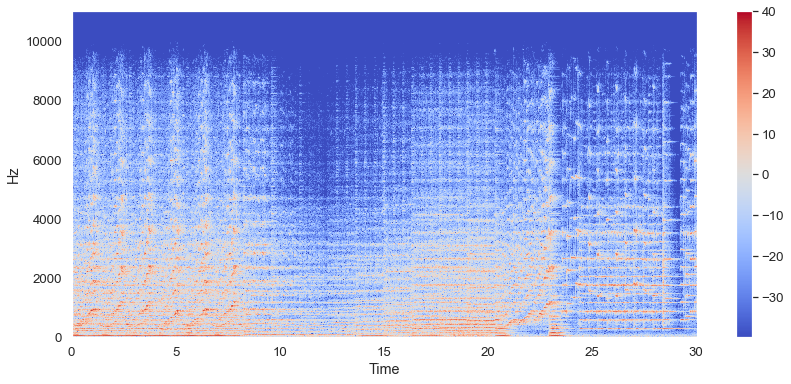

In [63]:
X = librosa . stft ( data )
Xdb = librosa . amplitude_to_db (abs( X ) )
plt . figure ( figsize =(14 , 6) )
librosa . display . specshow ( Xdb , sr = sr , x_axis ='time', y_axis ='hz')
plt . colorbar ()

## Zero Crossing Rate

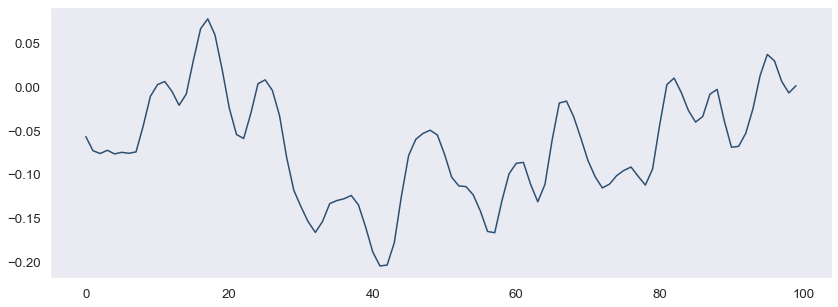

In [64]:
n0 = 9000
n1 = 9100
plt . figure ( figsize =(14 , 5) )
plt . plot ( data [ n0 : n1 ] , color ="#2B4F72")
plt . grid ()

In [65]:
zero_crossings = librosa . zero_crossings ( data [ n0 : n1 ] , pad = False )
print ("The number of zero - crossings is :",sum( zero_crossings ) )

The number of zero - crossings is : 11


## Chromagram Plot

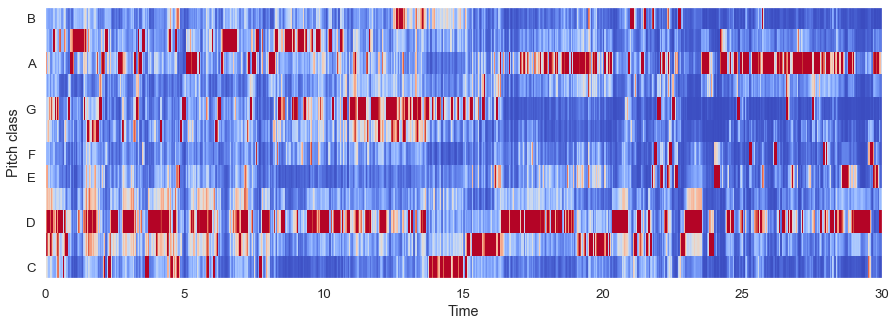

In [66]:
chromagram = librosa . feature . chroma_stft ( data , sr = sr )
plt . figure ( figsize =(15 , 5) )
librosa . display . specshow ( chromagram , x_axis ='time', y_axis ='chroma', cmap
='coolwarm')